<a href="https://colab.research.google.com/github/Jaswithagadde/internship/blob/main/K_Nearest_Neighbors_(KNN)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy for different K values:
  K=1: Accuracy = 0.80
  K=3: Accuracy = 0.83
  K=5: Accuracy = 0.83
  K=7: Accuracy = 0.80
  K=9: Accuracy = 0.87


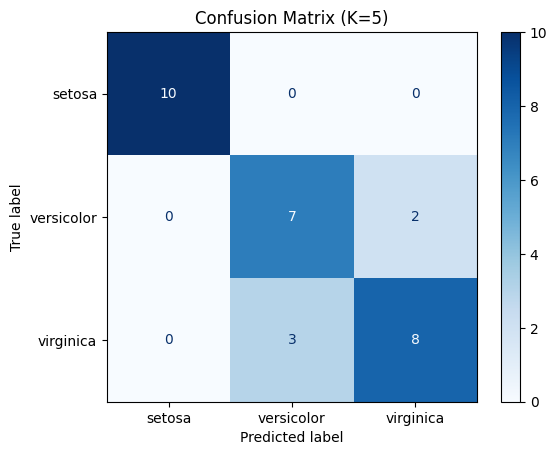

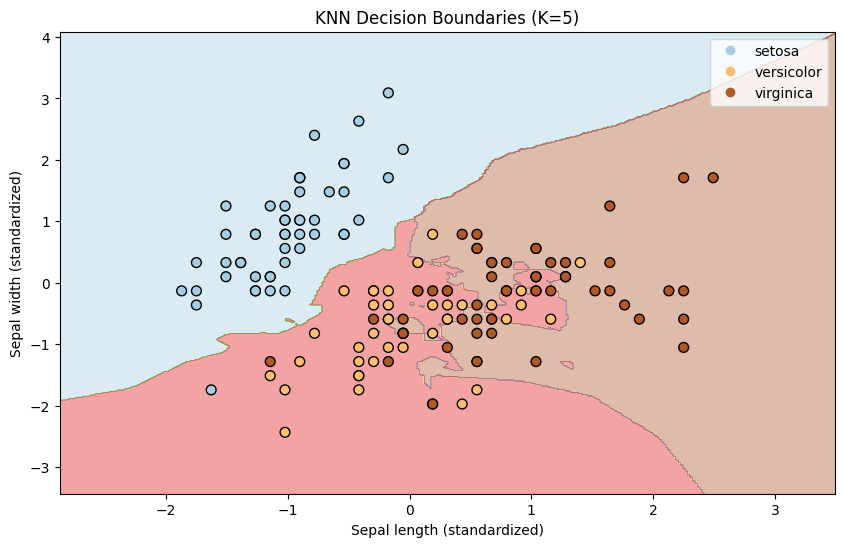

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

k_values = [1, 3, 5, 7, 9]
accuracies = []
print("Accuracy for different K values:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"  K={k}: Accuracy = {acc:.2f}")

best_k = 5
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

def plot_decision_boundaries(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length (standardized)')
    plt.ylabel('Sepal width (standardized)')
    plt.title(title)


    handles, _ = scatter.legend_elements()
    plt.legend(handles=list(handles), labels=list(iris.target_names))
    plt.show()

plot_decision_boundaries(X_scaled, y, knn, f"KNN Decision Boundaries (K={best_k})")
